# Homework 3

## Assignment Info
Homework #: HW3 \
Description: PCA \
Course: EN.553.636 Introduction to Data Science \
Semester: Spring 2023, Homewood Campus	\
Instructor: Tamas Budavari \
TA: Matthew Tivnan \
Date: February 25, 2023 

## Student Info
Name: Amir Hossein Daraie \
JHED-ID: adaraie1 \
Email: adaraie1@jhu.edu 

We load the `music_scaled.csv` dataset ([source](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#)). The dataset contains a sample of traditional songs from different cultures. Features F1 to F68 are quantitative summaries of the songs from audio analysis software. These features have been subject to standard scaling. They are stored as predictors in `X.` The latitudes of the countries from which the songs originate are stored as a target variable `y.`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_csv("music_scaled.csv")
X = data.iloc[:,:68]
y = data["Latitude"]
display(X)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F59,F60,F61,F62,F63,F64,F65,F66,F67,F68
0,-1.094000,-1.280592,2.806926,-0.097576,-0.791472,2.440896,0.003710,-0.864715,0.738257,-0.185613,...,0.465685,1.651588,0.169668,0.348005,-0.385988,-0.137105,-0.421766,-0.296043,-0.731677,-0.442480
1,-1.285544,-0.940198,-0.721321,-0.172044,-2.127893,2.549762,1.365750,0.489953,1.692462,0.387044,...,0.534732,-0.935377,-1.176909,-1.408592,-0.986426,-1.293346,-1.239692,-0.729675,-1.153275,-1.254825
2,0.503962,0.497136,-0.319168,0.330719,-0.398783,-0.749429,-2.380589,0.951098,-0.452177,-0.761333,...,0.274432,0.150854,0.161782,0.101072,-0.071694,-0.835381,-0.397305,-0.456676,-0.492329,-0.761836
3,-1.119978,0.696697,0.612882,-0.983295,1.333148,1.557607,-0.999593,-1.067051,0.811559,0.437626,...,0.696481,0.091214,-0.051819,0.219476,0.001850,-0.088704,-0.068108,-0.070306,0.277593,-0.071959
4,1.256214,1.066239,0.984965,-0.312513,-2.111077,0.009980,0.509741,0.837961,0.420966,0.366289,...,1.816629,0.593634,0.746647,0.035940,-0.292118,0.075086,-0.238434,-0.347040,-0.693764,0.053940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.089066,0.045324,-0.527161,0.274475,0.113220,-1.011250,-1.071873,-1.533993,-3.432258,-5.225601,...,0.269233,3.032646,3.000290,2.279520,3.409849,-0.028728,1.661721,3.501781,2.685491,1.111113
1055,0.558342,0.274368,-0.356357,-0.410656,0.710800,-0.240603,-0.370162,0.870655,-1.488764,0.566561,...,1.723216,3.048129,2.819643,1.571712,0.935972,0.406948,0.725402,-0.630365,1.991043,0.462783
1056,0.880180,0.668551,0.115084,-0.373637,0.848817,-0.859218,-0.823580,0.051974,-1.144327,1.314224,...,1.075571,3.199856,0.321025,0.897483,0.356881,1.262655,0.939693,-0.032762,0.801281,0.081143
1057,-0.990084,-1.094018,3.645894,-0.474362,-1.129270,0.188591,0.092048,0.252823,-0.377933,0.510161,...,4.246089,1.513936,1.893477,1.733179,0.707100,1.219381,-0.573497,-0.156859,-0.796013,-0.849146


### Question 1 (2 pts)

a) Perform linear regression of **y** on **X** using `sklearn.linear_model.LinearRegression` when the regressors consist of:
- F1 only; 
- F1 and F2 only; 
- F1, F2, and F3 only; 
- F1, F2, F3, ........, and F68. 

b) In each of the above 4 cases, print the estimated coefficient for **F1**.

In [3]:
model = LinearRegression()
for i in range(X.shape[1]):
    coeffs_i = model.fit(X.iloc[:,:i+1],y)
    print(f'Coeff F1 for LinearRegression model trained on X[:,0:{i+1:2}] is {coeffs_i.coef_[0]:4f}')

Coeff F1 for LinearRegression model trained on X[:,0: 1] is 0.659734
Coeff F1 for LinearRegression model trained on X[:,0: 2] is 1.669923
Coeff F1 for LinearRegression model trained on X[:,0: 3] is 2.222158
Coeff F1 for LinearRegression model trained on X[:,0: 4] is 2.324427
Coeff F1 for LinearRegression model trained on X[:,0: 5] is 2.268298
Coeff F1 for LinearRegression model trained on X[:,0: 6] is 2.845235
Coeff F1 for LinearRegression model trained on X[:,0: 7] is 3.332087
Coeff F1 for LinearRegression model trained on X[:,0: 8] is 3.356679
Coeff F1 for LinearRegression model trained on X[:,0: 9] is 3.269857
Coeff F1 for LinearRegression model trained on X[:,0:10] is 3.303232
Coeff F1 for LinearRegression model trained on X[:,0:11] is 3.292077
Coeff F1 for LinearRegression model trained on X[:,0:12] is 3.320890
Coeff F1 for LinearRegression model trained on X[:,0:13] is 3.347535
Coeff F1 for LinearRegression model trained on X[:,0:14] is 3.326816
Coeff F1 for LinearRegression mode

### Question 2 (3 pts)

a) Perform a manual implementation to compute a full set of principal components of **X** using the following steps:
- Compute the sample covariance matrix 
- Perform the eigen decomposition of the covariance matrix
- Project the data onto the principal components (eigenvectors of the covariance matrix)


b) Perform linear regression of **y** on the PCs using `sklearn.linear_model.LinearRegression` when the regressors consist of 
- PC1 only; 
- PC1 and PC2 only; 
- PC1, PC2, and PC3 only;
- and PC1, PC2, PC3,  ........, and PC68. 

c) In each of the above 4 cases, print the estimated coefficient for **PC1**.

In [4]:
X = X.to_numpy().T

In [5]:
X_mean =  X.mean(axis=1)[np.newaxis]
X_norm = (X - X_mean.T)
C = (X_norm @ X_norm.T) / (X.shape[0]-1)

In [18]:
L,E = np.linalg.eigh(C)

L = L[::-1]
E = E[:,::-1]

print(E)
print(L)

[[-4.53163805e-02 -5.34917047e-02  1.24463335e-01 ...  1.24187040e-01
  -5.39367002e-01  4.05276290e-01]
 [-6.56485245e-02 -6.39472605e-02  1.95394851e-01 ...  8.90617762e-03
   4.79952222e-01 -4.51821923e-01]
 [ 2.64016518e-02 -1.74354510e-01  1.46017715e-01 ... -1.03322170e-01
  -5.31592446e-02 -2.03133315e-02]
 ...
 [-2.19513585e-01  4.70861118e-02  1.97728427e-02 ... -2.31882852e-01
   3.51629833e-04 -1.71679372e-02]
 [-2.07908901e-01  5.45498221e-02  2.31983793e-02 ...  4.08714128e-01
   1.34858715e-03  1.11392139e-02]
 [-1.84100793e-01  3.78032967e-02  3.08133404e-02 ... -2.58634779e-01
   2.10911740e-03  1.13587698e-02]]
[2.14881064e+02 1.27394978e+02 8.28128332e+01 7.52252605e+01
 6.01153840e+01 3.56450275e+01 3.29628534e+01 2.95488651e+01
 2.70883283e+01 2.33705421e+01 2.20670446e+01 2.05901873e+01
 1.98397696e+01 1.75940962e+01 1.58917496e+01 1.53888493e+01
 1.49037698e+01 1.46028604e+01 1.33415399e+01 1.28066744e+01
 1.25648283e+01 1.10105340e+01 1.00304329e+01 9.75370925e+0

In [19]:
A = E.T @ X # Project data onto principle components

In [20]:
model = LinearRegression()
model.fit(A[:1,:].T,y)
model.coef_

array([0.08259023])

In [21]:
model = LinearRegression()
A = A.T
for i in range(X.shape[0]):
    coeffs_i = model.fit(A[:,:i+1],y)
    print(f'Coeff F1 for LinearRegression model trained on X[:,:{i+1:2}] is {coeffs_i.coef_[0]:4f}')

Coeff F1 for LinearRegression model trained on X[:,: 1] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 2] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 3] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 4] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 5] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 6] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 7] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 8] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,: 9] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,:10] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,:11] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,:12] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,:13] is 0.082590
Coeff F1 for LinearRegression model trained on X[:,:14] is 0.082590
Coeff F1 for LinearRegression model trained on X

### Question 3 (3 pts)

a) What do you observe in terms of estimated coefficients of **F1** when the number of regressors are increased compared to the estimated coefficients of **PC1** when the number of regressors are increased?

b) Explain the reason behind this observation.

Answer: For the estimated coefficients of **F1**, we observe that as the number of regressors increase, it change and vary. This shows that The slope in the first dimension changes as the number of regressors change.

However, we observed almost no change in the estimated coefficients of **PC1** when we project the data points into the PC space. This is what I was expecting at the beginning as well. The reason is that when we project data into the PC space, the basis vectors are linearly independent, henceforth, the coefficients should be the same, regardless of the number of PCi axis that we include. 

So PCi is orthogonal to PCj for $0 <= i,j <= 68$



### Question 4 (2 pts)

a) Print the correlation matrix of all the PC's.

b) Which matrix does it closely resemble to? 

c) Which feature of the principal components is depicted through this matrix?

In [22]:
print(E @ E.T)

[[ 1.00000000e+00 -4.99600361e-16 -1.94289029e-16 ...  4.33680869e-18
  -1.64798730e-17 -8.50014503e-17]
 [-4.99600361e-16  1.00000000e+00  9.54097912e-17 ... -8.67361738e-19
  -2.77555756e-17 -9.54097912e-17]
 [-1.94289029e-16  9.54097912e-17  1.00000000e+00 ... -2.65412692e-16
   9.70903045e-17  1.77863366e-16]
 ...
 [ 4.33680869e-18 -8.67361738e-19 -2.65412692e-16 ...  1.00000000e+00
  -3.00134266e-16  1.39780765e-16]
 [-1.64798730e-17 -2.77555756e-17  9.70903045e-17 ... -3.00134266e-16
   1.00000000e+00 -9.15337684e-17]
 [-8.50014503e-17 -9.54097912e-17  1.77863366e-16 ...  1.39780765e-16
  -9.15337684e-17  1.00000000e+00]]


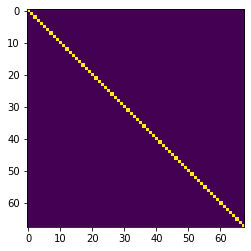

In [23]:
plt.imshow(E @ E.T)

It closely resembles the Identity matrix. 

In [24]:
np.isclose(E@E.T, np.eye(68))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

It shows that princple components are orthogonal to each other.